# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
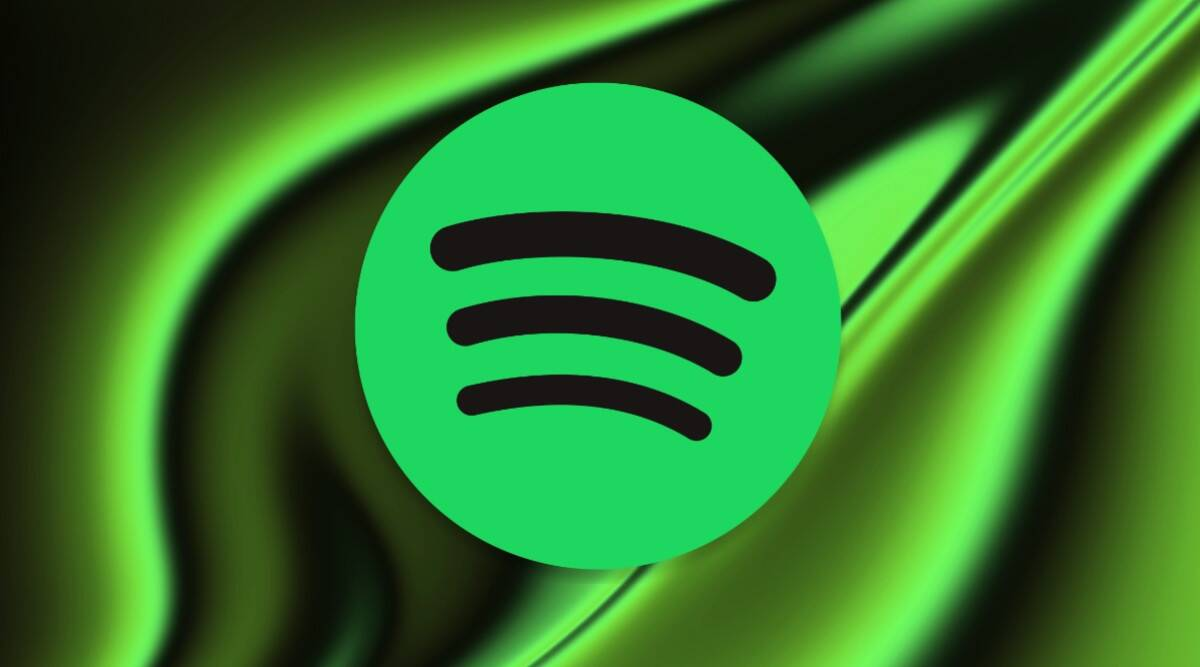
</div>

# Import Libraries

In [605]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [606]:
# !pip install seaborn
# !pip install xgboost

In [607]:
%pwd

'/Users/heliaa/Desktop/untitled folder 3'

# Load Spotify Dataset (CSV file)

In [608]:
spotify_df = pd.read_csv("../persian_spotify.zip")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [609]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [610]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [611]:
column_types = spotify_df.dtypes
categorical_cols = column_types[column_types == 'object'].index.tolist()
categorical_cols

['track_id',
 'track_name',
 'track_name_farsi',
 'artist_name',
 'artist_name_farsi',
 'album_href',
 'album_id',
 'album_name',
 'album_release_date',
 'track_href',
 'key_name',
 'mode_name',
 'key_mode']

In [612]:
numerical_cols = column_types[column_types != 'object'].index.tolist()
numerical_cols

['disc_number',
 'duration_ms',
 'explicit',
 'popularity',
 'track_number',
 'album_total_tracks',
 'album_release_year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

## Q: Get number of songs by each of the artists in descending order

In [613]:
# Count the number of songs by each artist
artist_counts = spotify_df['artist_name'].value_counts().reset_index()
artist_counts.columns = ['artist_name', 'Number of Songs']
artist_counts_sorted = artist_counts.sort_values('Number of Songs', ascending=False)

artist_counts_sorted 

,artist_name,Number of Songs
0,Mohammadreza Shajarian,554
1,Hossein Alizadeh,545
2,Reza Sadeghi,507
3,Dariush,465
4,Alireza Eftekhari,439
...,...,...
64,Nasser Abdollahi,22
65,Mohammad Golriz,17
66,Ebrahim Monsefi,16
67,Farman Fathalian,10


## Q: Get the average duration of songs by each of the artists in minutes

In [614]:
# To be completed

artist_avg_duration = spotify_df.groupby('artist_name')['duration_ms'].mean() / (60*1000)

artist_avg_duration.reset_index()

,artist_name,duration_ms
0,Abbas Ghaderi,5.074705
1,Abdolhosein Mokhtabad,6.228769
2,Afshin Moghaddam,4.100780
3,Ali Lohrasbi,3.602079
4,Ali Zand Vakili,4.854786
...,...,...
64,Siavash Ghomayshi,4.341582
65,Sirvan Khosravi,4.352529
66,Soheil Nafissi,3.063580
67,Tohi,3.523408


## Q: list of artist's unique names

In [615]:
# To be completed
# Get a list of unique artist names
unique_artists = spotify_df['artist_name'].unique().tolist()

unique_artists

['Salar Aghili',
 'Mohsen Yeganeh',
 'Mehdi Yarrahi',
 'Mohammadreza Shajarian',
 'Morteza Pashaei',
 'Hesameddin Seraj',
 'Mohammad Esfahani',
 'Mohsen Chavoshi',
 'Reza Sadeghi',
 'Abdolhosein Mokhtabad',
 'Alireza Assar',
 'Roozbeh Nematollahi',
 'Hossein Alizadeh',
 'Peyman Yazdanian',
 'Kayhan Kalhor',
 'Siavash Ghomayshi',
 'Benyamin Bahadori',
 'Alireza Eftekhari',
 'Majid Akhshabi',
 'Faramarz Aslani',
 'Iraj Bastami',
 'Ehsan Khajeh Amiri',
 'Alireza Ghorbani',
 'Parviz Meshkatian',
 'Mohammad Reza Lotfi',
 'Dang Show',
 'Nasser Abdollahi',
 'Soheil Nafissi',
 'Farhad Mehrad',
 'Afshin Moghaddam',
 'Koveyti Poor',
 'Mohammad Golriz',
 'Abbas Ghaderi',
 'Javad Yassari',
 'Sattar',
 'Mohsen Sharifian',
 'Babak Jahanbakhsh',
 'Mazyar Fallahi',
 'Mohammad Alizadeh',
 'Farzad Farzin',
 'Ali Zand Vakili',
 'Amirabbas Golab',
 'Hamid Askari',
 'Mohsen Namjoo',
 'Hamed Homayoun',
 'Kaveh Deylami',
 'Hatam Asgari',
 'Hamid Hami',
 'Shahram Shabpareh',
 'Moein',
 'Hassan Shamaizadeh',
 

## Q: Plot average duration of tracks by year

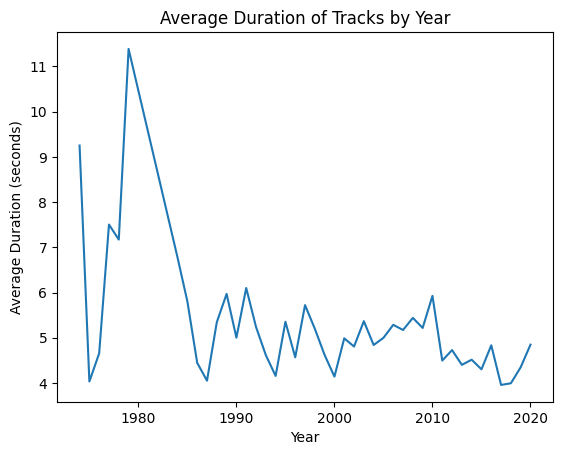

In [616]:
# To be completed

# Filter out the first row
df_filtered = spotify_df[spotify_df['album_release_year'] != 0]

# Calculate the average duration of tracks by year
avg_duration_by_year = df_filtered.groupby('album_release_year')['duration_ms'].mean()/(60*1000)

# Plotting
plt.plot(avg_duration_by_year.index, avg_duration_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Tracks by Year')
plt.show()

## Q: Plot average loudness of tracks by year

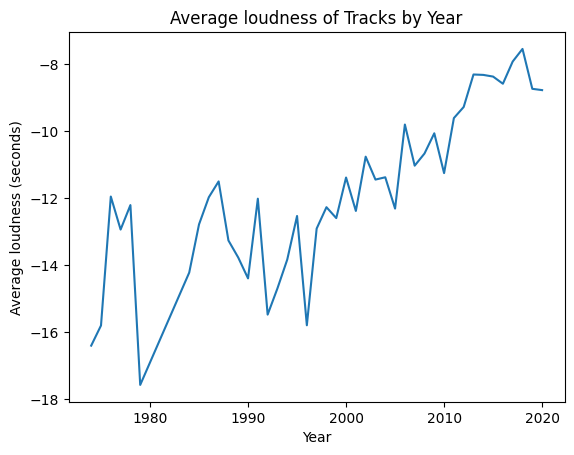

In [617]:
# To be completed

# Filter out the first row
df_filtered = spotify_df[spotify_df['album_release_year'] != 0]

# Calculate the average duration of tracks by year
avg_duration_by_year = df_filtered.groupby('album_release_year')['loudness'].mean()

# Plotting
plt.plot(avg_duration_by_year.index, avg_duration_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average loudness (seconds)')
plt.title('Average loudness of Tracks by Year')
plt.show()

## Q: Music attributes of songs over the years


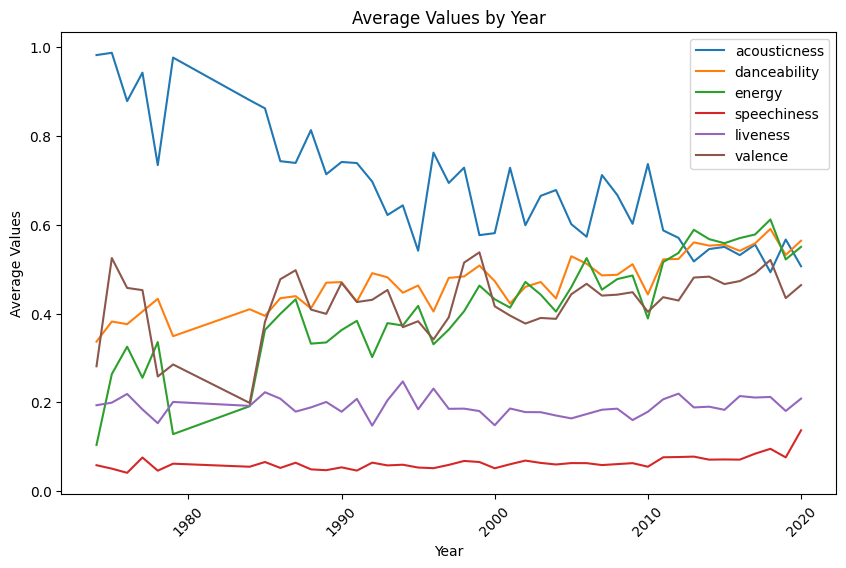

In [618]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# To be completed

# Filter out the first row
df_filtered = spotify_df[spotify_df['album_release_year'] != 0]

# Calculate the average duration of tracks by year
avg_duration_by_year = df_filtered.groupby('album_release_year')[target_cols].mean()

# Plotting


plt.figure(figsize=(10, 6))

for values in target_cols:
    plt.plot(avg_duration_by_year.index, avg_duration_by_year[values], label=values)

# plt.plot(avg_duration_by_year.index, avg_duration_by_year.values)
    
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Average Values by Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

In [619]:
tracks_popularity = spotify_df['popularity'].sort_values(ascending=False)[:10]

/var/folders/g1/dmkdm0ld5hg10nkqjgj2k4tw0000gn/T/ipykernel_22132/2069741744.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  tracks_popularity = spotify_df['popularity'].sort_values(ascending=False)[:10]


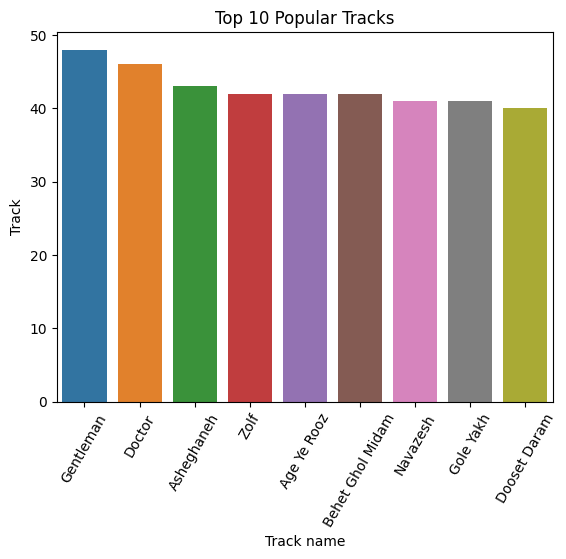

In [620]:
# To be completed

# Sort the DataFrame by popularity in descending order and select the top 10 tracks
top_10_tracks = spotify_df.sort_values('popularity', ascending=False).head(10)

# Plot the top 10 popular tracks using a bar chart
# plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_tracks, x='track_name', y='popularity')
plt.xlabel('Track name')
plt.ylabel('Track')
plt.xticks(rotation=60)
plt.title('Top 10 Popular Tracks')
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

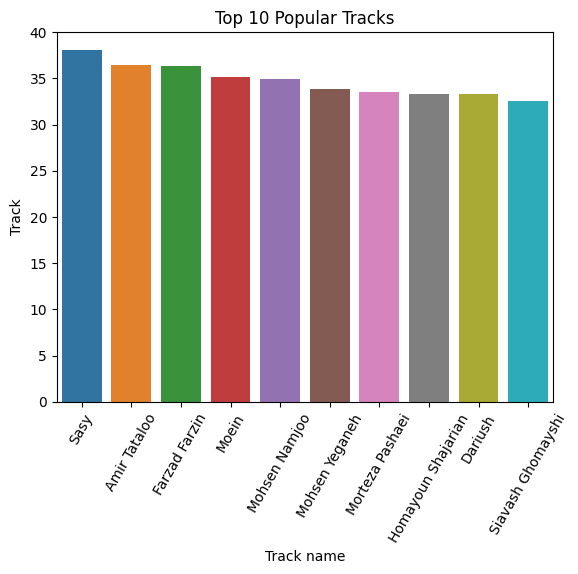

In [621]:
# To be completed

# Calculate the average popularity for each artist
artist_popularity = spotify_df.groupby('artist_name')['popularity'].mean().reset_index()

# Sort the DataFrame by popularity in descending order and select the top 10 artists
top_10_artists = artist_popularity.sort_values('popularity', ascending=False).head(10)

# Plot the top 10 popular tracks using a bar chart
# plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artists, x='artist_name', y='popularity')
plt.xlabel('Track name')
plt.ylabel('Track')
plt.xticks(rotation=60)
plt.title('Top 10 Popular Tracks')
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

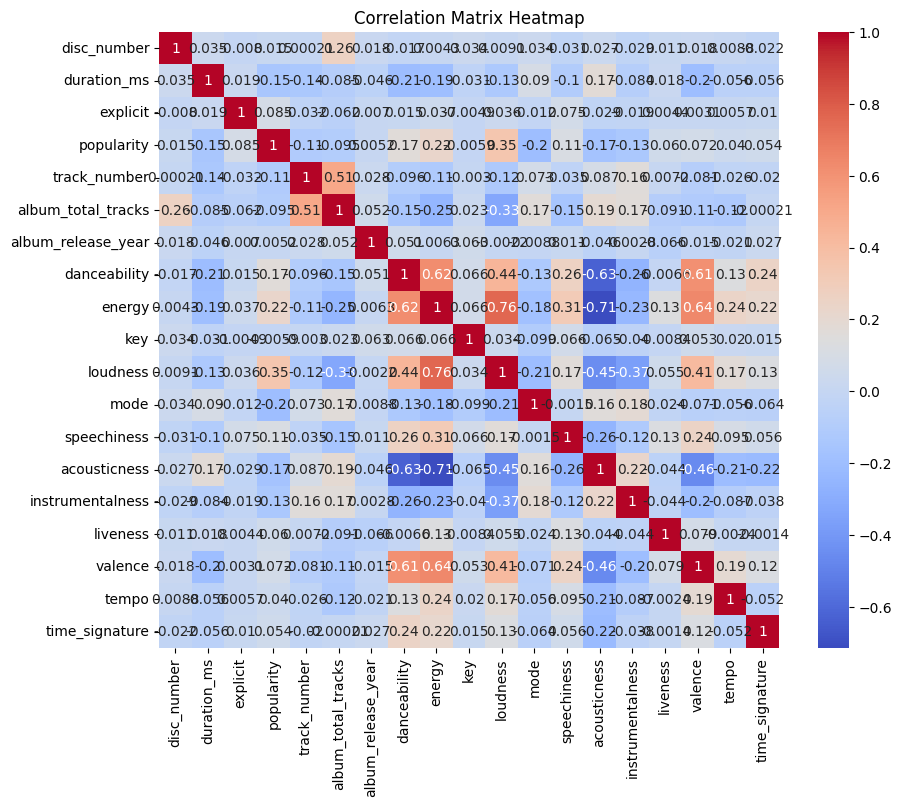

In [622]:
# To be completed

# Calculate the correlation matrix
correlation_matrix = spotify_df.corr(numeric_only=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [623]:
most_correlated_features_popularity = correlation_matrix.loc['popularity'].drop('popularity').sort_values(ascending=False)[1:]
print("Most correlated features with popularity:")
most_correlated_features_popularity.index[0],most_correlated_features_popularity.values[0]

Most correlated features with popularity:


('energy', 0.22351521448276207)

In [624]:
most_correlated_features_duration = correlation_matrix['duration_ms'].sort_values(ascending=False)[1:]
most_correlated_features_duration

print("Most correlated features with duration_ms:")
most_correlated_features_duration.index[0],most_correlated_features_duration.values[0]

Most correlated features with duration_ms:


('acousticness', 0.17071279701216824)

## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

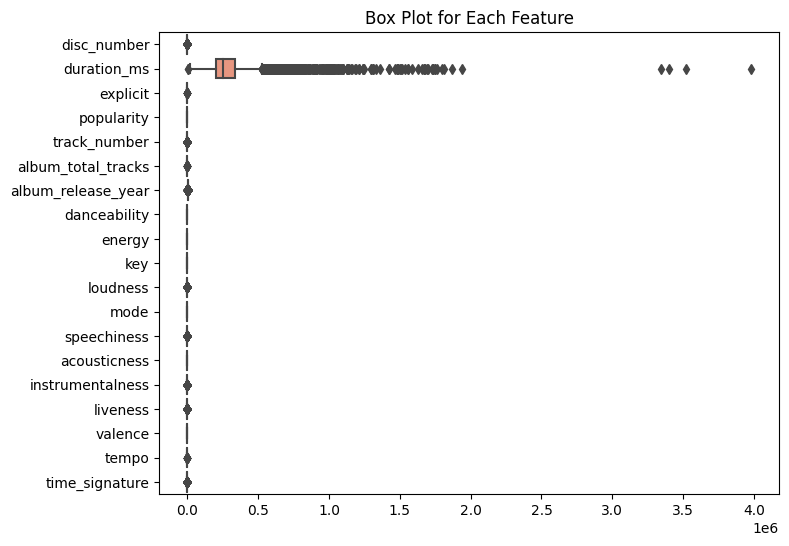

In [625]:
# To be completed

# Plot a box plot for each feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=spotify_df, orient='h')
plt.title('Box Plot for Each Feature')
plt.show()

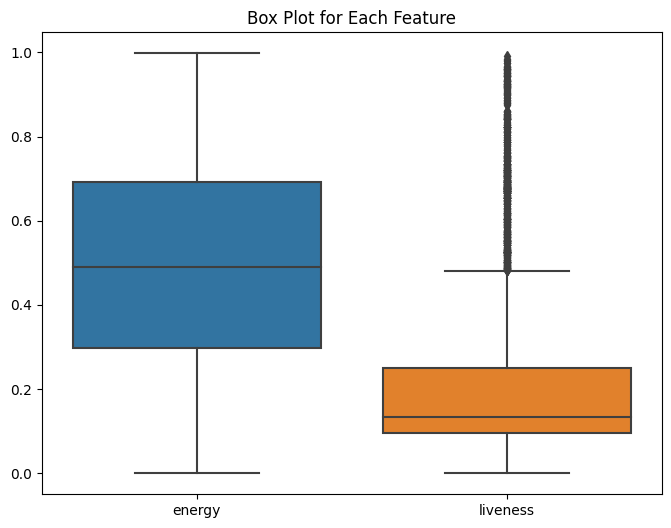

In [626]:
# Plot a box plot for each feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=spotify_df[['energy', 'liveness']],orient='v')
plt.title('Box Plot for Each Feature')
plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [627]:
# To be completed

# Count the number of NaN values in each column
nan_counts = spotify_df.isna().sum()

nan_counts.to_frame(name='NaN').reset_index()

,index,NaN
0,track_id,0
1,disc_number,0
2,duration_ms,0
3,explicit,0
4,track_name,0
5,track_name_farsi,10020
6,artist_name,0
7,artist_name_farsi,0
8,popularity,9701
9,track_number,0


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [628]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            10632 non-null  object 
 1   disc_number         10632 non-null  int64  
 2   duration_ms         10632 non-null  int64  
 3   explicit            10632 non-null  bool   
 4   track_name          10632 non-null  object 
 5   track_name_farsi    612 non-null    object 
 6   artist_name         10632 non-null  object 
 7   artist_name_farsi   10632 non-null  object 
 8   popularity          931 non-null    float64
 9   track_number        10632 non-null  int64  
 10  album_href          931 non-null    object 
 11  album_id            10632 non-null  object 
 12  album_name          10632 non-null  object 
 13  album_release_date  10632 non-null  object 
 14  album_total_tracks  931 non-null    float64
 15  album_release_year  10632 non-null  int64  
 16  trac

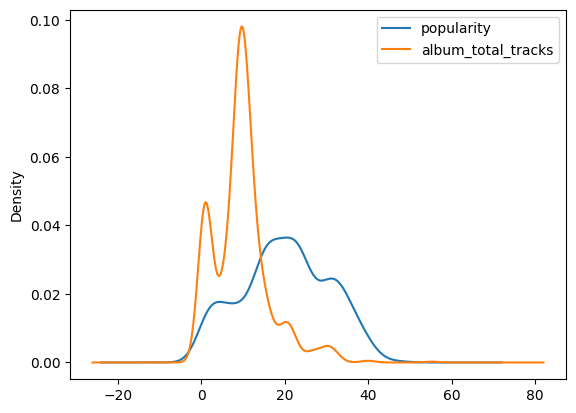

In [629]:
spotify_df['popularity'].plot.kde(label='popularity')
spotify_df['album_total_tracks'].plot.kde(label='album_total_tracks')
plt.legend()
plt.show()

In [630]:
# To be completed

# Mean: It is preferable to use the mean when dealing with numeric 
# data that is not skewed. The mean is calculated by summing all the 
# values and dividing by the total number of values. It provides a 
# measure of central tendency that takes into account all the data points equally.

# Median: On the other hand, when dealing with numeric data that is skewed,
# it is preferable to use the median. The median represents the middle value
# in a dataset when it is sorted in ascending or descending order.
# It is not influenced by extreme values or outliers, making it a more
# robust measure of central tendency in the presence of skewed data.

categorical_columns = ['track_name_farsi', 'album_href', 'key_name', 'mode_name', 'key_mode']
# Fill missing categorical values with "None"
spotify_df[categorical_columns]=spotify_df[categorical_columns].fillna("None")

# To be completed

numerical_features = ['popularity', 'album_total_tracks']

spotify_df['popularity'].fillna(spotify_df['popularity'].mean(), inplace=True)
spotify_df['album_total_tracks'].fillna(spotify_df['album_total_tracks'].median(), inplace=True) 

spotify_df.isna().sum().to_frame(name='NaN').reset_index()

,index,NaN
0,track_id,0
1,disc_number,0
2,duration_ms,0
3,explicit,0
4,track_name,0
5,track_name_farsi,0
6,artist_name,0
7,artist_name_farsi,0
8,popularity,0
9,track_number,0


In [631]:
missing_values = spotify_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 track_id              0
disc_number           0
duration_ms           0
explicit              0
track_name            0
track_name_farsi      0
artist_name           0
artist_name_farsi     0
popularity            0
track_number          0
album_href            0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_release_year    0
track_href            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
key_name              0
mode_name             0
key_mode              0
dtype: int64


In [632]:
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.974417,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,3.080703,4.533367,1.996494,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.113856,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# Determine your desired features here

In [633]:
music_feature_cols = [
   'speechiness',
   'acousticness'	,
   'instrumentalness'	,
   'liveness'	,
   'valence'	,
   'tempo',
   'danceability',
   'duration_ms', 
   'loudness',
   'key_mode'
]

In [634]:
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.974417,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,3.080703,4.533367,1.996494,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.113856,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [635]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,duration_ms,loudness,key_mode,artist_name
0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,0.437,446880,-7.170,C minor,Salar Aghili
1,0.0414,0.970,0.000360,0.0812,0.3460,105.634,0.379,851920,-10.008,F major,Salar Aghili
2,0.0349,0.664,0.002070,0.1100,0.5010,94.651,0.437,293160,-5.392,F minor,Salar Aghili
3,0.0451,0.915,0.006580,0.2120,0.4450,110.967,0.488,648720,-12.287,D minor,Salar Aghili
4,0.0334,0.657,0.000008,0.1200,0.4100,148.053,0.301,273480,-5.702,C minor,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...
10627,0.0452,0.946,0.005460,0.3530,0.3960,146.591,0.356,397505,-10.805,E minor,Shahram Nazeri
10628,0.0690,0.982,0.061400,0.6670,0.1610,72.379,0.318,3522173,-17.538,F minor,Shahram Nazeri
10629,0.0350,0.883,0.019400,0.2630,0.1390,86.645,0.213,3402706,-15.865,G# major,Shahram Nazeri
10630,0.0369,0.842,0.223000,0.7980,0.2100,77.819,0.242,3342733,-13.286,G# major,Shahram Nazeri


In [636]:
categorical_cols = ["key_mode"]

## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [637]:
numeric_cols = ['speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'danceability', 'duration_ms', 'loudness']

spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.974417,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,3.080703,4.533367,1.996494,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.113856,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [638]:
from sklearn.preprocessing import  LabelEncoder

ss = StandardScaler()
tracks_feature_df[numeric_cols] = ss.fit_transform(tracks_feature_df[numeric_cols])

le =  LabelEncoder()

tracks_feature_df[categorical_cols] = tracks_feature_df[categorical_cols].apply(lambda x: le
                                                                                .fit_transform(x))


tracks_feature_df['popularity'] = spotify_df['popularity']
tracks_feature_df

,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,duration_ms,loudness,key_mode,artist_name,popularity
0,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-0.428643,0.932542,0.629863,7,Salar Aghili,20.113856
1,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,-0.765201,3.321961,0.013646,16,Salar Aghili,20.113856
2,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,-0.428643,0.025714,1.015921,17,Salar Aghili,20.113856
3,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,-0.132704,2.123240,-0.481195,11,Salar Aghili,20.113856
4,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-1.217813,-0.090383,0.948610,7,Salar Aghili,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...
10627,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,-0.898663,0.641268,-0.159407,15,Shahram Nazeri,20.113856
10628,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.119167,19.074364,-1.621347,17,Shahram Nazeri,20.113856
10629,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,-1.728453,18.369602,-1.258088,22,Shahram Nazeri,20.113856
10630,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.560174,18.015808,-0.698108,22,Shahram Nazeri,20.113856


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


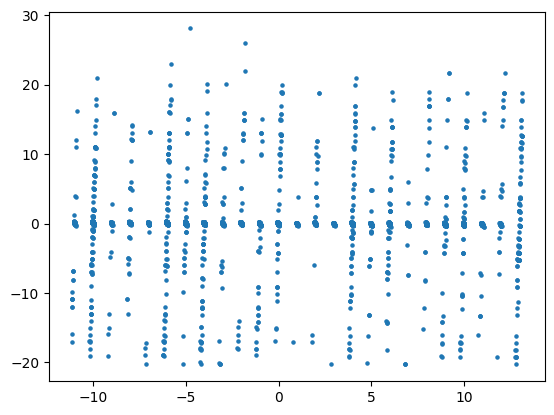

In [639]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 2)


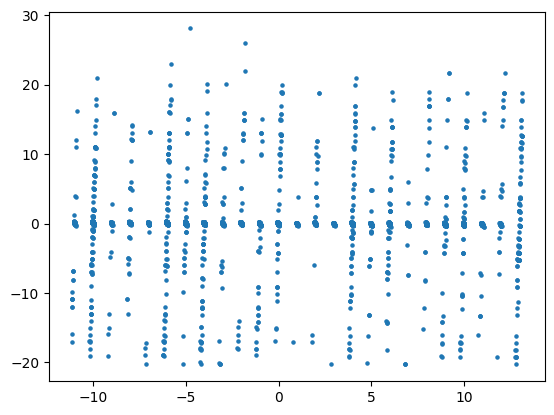

In [640]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


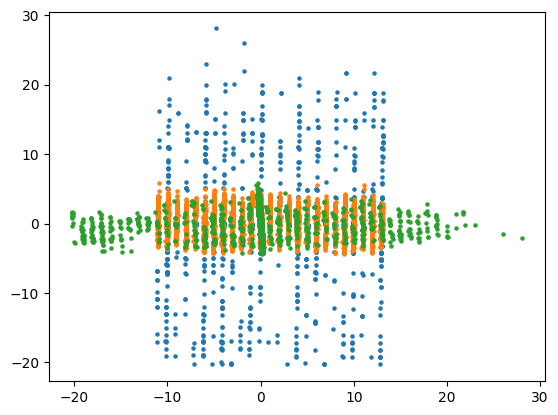

In [641]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [642]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [643]:
df = tracks_feature_df

regression_features =  [
                 # Your desired features columns 
              "danceability", 
              "speechiness", 
              "liveness"
       ]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [644]:
regressor = LinearRegression(
    fit_intercept=True, copy_X=True
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.110712677102008
[0.14345055 0.077208   0.01164099]


## Evaluate Regression Algorithm

In [645]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [646]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8494006654455675
Mean Squared Error: 8.879993441802206
Root Mean Squared Error: 2.9799317847565248


# Classification

## Prepare Labels

In [647]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [648]:
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)

In [649]:
tracks_feature_df.describe()

,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,duration_ms,loudness,key_mode,popularity,is_sonnati
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000,10632.000000,10632.000000
mean,-8.019670e-18,-3.983103e-16,7.485025e-17,-7.485025e-17,-1.924721e-16,3.421726e-16,-2.994010e-16,-1.336612e-17,-2.486098e-16,11.017588,20.113856,0.358728
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,6.977352,3.080703,0.479650
min,-9.826719e-01,-1.918195e+00,-4.481700e-01,-1.248615e+00,-1.884641e+00,-4.002013e+00,-2.964434e+00,-1.680127e+00,-5.934864e+00,0.000000,0.000000,0.000000
25%,-4.747521e-01,-8.735159e-01,-4.481700e-01,-6.295786e-01,-8.106294e-01,-8.134842e-01,-8.058199e-01,-5.028027e-01,-5.634327e-01,5.000000,20.113856,0.000000
50%,-3.509379e-01,3.631892e-01,-4.478620e-01,-3.892012e-01,-1.235549e-01,2.329099e-02,-8.047930e-02,-2.075528e-01,2.179660e-01,10.000000,20.113856,0.000000
75%,-3.682961e-02,8.572419e-01,-3.957539e-01,3.668246e-01,7.632628e-01,6.252294e-01,8.189431e-01,2.653078e-01,7.497731e-01,17.000000,20.113856,1.000000
max,1.222887e+01,1.215981e+00,3.052098e+00,5.161450e+00,2.214799e+00,3.371699e+00,2.629393e+00,2.176604e+01,2.050765e+00,24.000000,48.000000,1.000000


## Create Classification Dataset

In [650]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'artist_name',]).values
y = tracks_feature_df['is_sonnati'].values

In [651]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 12)
y.shape=(10632,)


In [652]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [653]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

### KNN

In [654]:
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=5), dataset))

{'acc': 0.8178683385579937,
 'confusion': array([[1799,  296],
       [ 285,  810]]),
 'f1': 0.7360290776919582,
 'precision': 0.7323688969258589,
 'recall': 0.7397260273972602}


### Naive Bayes

In [655]:
from sklearn.naive_bayes import GaussianNB

pprint(fit_and_eval(GaussianNB(), dataset))

{'acc': 0.793730407523511,
 'confusion': array([[1662,  433],
       [ 225,  870]]),
 'f1': 0.725604670558799,
 'precision': 0.6676899462778204,
 'recall': 0.7945205479452054}


### SVM

In [656]:
pprint(fit_and_eval(SVC(C=100,kernel='rbf'),dataset))

{'acc': 0.8304075235109718,
 'confusion': array([[1822,  273],
       [ 268,  827]]),
 'f1': 0.7535307517084282,
 'precision': 0.7518181818181818,
 'recall': 0.7552511415525114}


In [657]:
pprint(fit_and_eval(SVC(kernel='linear'),dataset))

{'acc': 0.8094043887147335,
 'confusion': array([[1777,  318],
       [ 290,  805]]),
 'f1': 0.7258791704238052,
 'precision': 0.7168299198575245,
 'recall': 0.7351598173515982}


In [658]:
pprint(fit_and_eval(SVC(kernel='poly'),dataset))

{'acc': 0.7984326018808777,
 'confusion': array([[1843,  252],
       [ 391,  704]]),
 'f1': 0.6864943929790347,
 'precision': 0.7364016736401674,
 'recall': 0.6429223744292237}


### Desicion Tree

In [659]:
pprint(fit_and_eval(DecisionTreeClassifier(),dataset))

{'acc': 0.812539184952978,
 'confusion': array([[1809,  286],
       [ 312,  783]]),
 'f1': 0.7236598890942698,
 'precision': 0.7324602432179607,
 'recall': 0.7150684931506849}


### MLPClassifier

In [660]:
pprint(fit_and_eval(MLPClassifier(),dataset))

{'acc': 0.8266457680250784,
 'confusion': array([[1786,  309],
       [ 244,  851]]),
 'f1': 0.7547671840354767,
 'precision': 0.7336206896551725,
 'recall': 0.7771689497716895}


/Users/heliaa/tfod/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### AdaBoost

In [661]:
pprint(fit_and_eval(AdaBoostClassifier(n_estimators=1000),dataset))

{'acc': 0.8313479623824451,
 'confusion': array([[1823,  272],
       [ 266,  829]]),
 'f1': 0.755009107468124,
 'precision': 0.7529518619436876,
 'recall': 0.7570776255707763}


### GradientBoostingClassifier

In [662]:
from sklearn.ensemble import GradientBoostingClassifier

pprint(fit_and_eval(GradientBoostingClassifier(),dataset))

{'acc': 0.8394984326018808,
 'confusion': array([[1818,  277],
       [ 235,  860]]),
 'f1': 0.7706093189964157,
 'precision': 0.7563764291996482,
 'recall': 0.7853881278538812}


### LogisticRegression

In [663]:
from sklearn.linear_model import LogisticRegression

pprint(fit_and_eval(LogisticRegression(),dataset))

{'acc': 0.806269592476489,
 'confusion': array([[1795,  300],
       [ 318,  777]]),
 'f1': 0.7154696132596685,
 'precision': 0.7214484679665738,
 'recall': 0.7095890410958904}


### Random Forest(FINAL)

Random Forest is a popular machine learning algorithm that is often considered better than other algorithms for several reasons:

Accuracy: Random Forest tends to provide higher accuracy compared to many other algorithms. It is an ensemble method that combines multiple decision trees, and each tree independently makes predictions. By aggregating the predictions of multiple trees, Random Forest reduces the risk of overfitting and provides robust and accurate results.

Reduced overfitting: Random Forest reduces overfitting by averaging the predictions of multiple decision trees. Each tree is trained on a random subset of the data and uses a random subset of features. This randomness and diversity in the trees help to generalize well to unseen data and improve the overall model's performance.

Handles high-dimensional data: Random Forest can effectively handle high-dimensional datasets, where the number of features is much larger than the number of samples. It automatically performs feature selection by evaluating the importance of each feature based on its contribution to the overall predictive power of the model.

Nonlinear relationships: Random Forest can capture complex nonlinear relationships between features and the target variable. It can handle interactions and nonlinearities without explicitly specifying them in advance, making it suitable for a wide range of problems.

Resistance to outliers: Random Forest is robust to outliers and noisy data. Since each tree is trained independently on a random subset of the data, the influence of outliers is reduced, and the final prediction is based on the majority vote or average of all the trees, making it less sensitive to individual data points.

Efficiency: Random Forest can efficiently handle large datasets. The algorithm can be parallelized, allowing it to take advantage of multi-core processors and distributed computing frameworks to speed up the training process.

However, it's important to note that the effectiveness of Random Forest depends on the specific problem and the quality of the data. In some cases, other algorithms or ensemble methods may perform better. It's always advisable to experiment with different algorithms and evaluate their performance on your specific task before concluding that Random Forest is the best choice.

In [664]:
pprint(fit_and_eval(RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=42), dataset))

{'acc': 0.8699059561128527,
 'confusion': array([[1893,  202],
       [ 213,  882]]),
 'f1': 0.8095456631482332,
 'precision': 0.8136531365313653,
 'recall': 0.8054794520547945}


In [665]:
#autograde
pprint(fit_and_eval(RandomForestClassifier(n_estimators=150, criterion="entropy", random_state=RANDOM_SEED), dataset))

{'acc': 0.8705329153605016,
 'confusion': array([[1899,  196],
       [ 217,  878]]),
 'f1': 0.8095896726602121,
 'precision': 0.8175046554934823,
 'recall': 0.8018264840182648}


### XGBClassifier 

In [666]:
pprint(fit_and_eval(XGBClassifier(),dataset))

{'acc': 0.8589341692789969,
 'confusion': array([[1864,  231],
       [ 219,  876]]),
 'f1': 0.7956403269754768,
 'precision': 0.7913279132791328,
 'recall': 0.8}


In [667]:
pprint(fit_and_eval(XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.4, gamma=0.2, colsample_bytree=0.4), dataset))

{'acc': 0.8630094043887148,
 'confusion': array([[1881,  214],
       [ 223,  872]]),
 'f1': 0.7996331957817516,
 'precision': 0.8029465930018416,
 'recall': 0.7963470319634703}
